<center>
<h1> Statistical Algorithms for Change Detection in Optical and SAR Imagery: </h1>

<h1> Implementations in Python and on the Google Earth Engine </h1>

<h2> Mort Canty, Jülich Germany </h2>
<h2> Allan A. Nielsen, DTU Denmark   </h2> 
<h2> </h2>

<h2> <em>GI Forum, Institute for Geoinformatics  (ifgi),  </em></h2>
<h2> <em>University of Münster, June 13, 2017 </em></h2>
</center>


# Topics:

## Visual/Infrared Imagery

### = The IR-MAD Algorithm: iterated canonical correlation analysis

### = Automatic relative radiometric normalization

## Polarimetric SAR Imagery

### = The bitemporal complex Wishart algorithm

### = The sequential omnibus algorithm

## Python Implementation

### = Jupyter/IPython notebooks in Docker containers

### = The Python API on the Google Earth Engine



## Visual/Infrared Imagery

### Simple differences

#### Two $N$-band image acquisitions represented by random vectors $X$ and $Y$. Bandwise differences
$$
Z_i = X_i-Y_i,\quad i=1\dots N
$$
#### For uncorrelated images
$$
{\rm var}(Z_i) = {\rm var}(X_i)+{\rm var}(Y_i) = \sigma_1^2 + \sigma_2^2
$$
#### Contrast with two $m$-look SAR intensity images $X$ and $Y$ (gamma distributed)
$$
{\rm var}(X-Y) = {\langle X\rangle^2+ \langle Y\rangle^2\over m}
$$

### MAD (Multivariate Alteration Detection)

<a href = "http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=4695"> A. A. Nielsen (2007). The Regularized Iteratively Reweighted MAD Method for Change Detection in Multi- and Hyperspectral Data.</a>

#### Construct the difference
$$
U-V
$$
#### where
$$
U = a^\top X,\quad V = b^\top Y
$$
#### Choose $a$ and $b$ so that the images are as similar as possible

#### Canonical correlation analysis:
$$
\rho = {{\rm cov}(U,V)\over \sqrt{{\rm var}(U)}\sqrt{{\rm var}(V)}}\to \max
$$
#### subject to 
$$
{\rm var}(U) = {\rm var}(V) = 1
$$


#### For the combined random vector $\pmatrix{X\cr Y}$
$$
\Sigma = \pmatrix{\Sigma_{XX} & \Sigma_{XY}\cr \Sigma^\top_{XY} & \Sigma_{YY}}
$$
#### so that
$$
{\rm var}(U) = a^\top \Sigma_{XX}a, \quad {\rm var}(V)= 
b^\top\Sigma_{YY}b,\quad {\rm cov}(U,V)=a^\top\Sigma_{XY}b
$$
#### Constrained maximization
$$
L = a^\top\Sigma_{XY}b-{\nu\over2}(a^\top\Sigma_{XX}a-1)-{\mu\over2}(b^\top\Sigma_{YY}b-1)
$$

$$
{\partial L\over\partial a} = {\partial L\over\partial b} = 0
$$
#### leads to a generalized, coupled eigenvalue problem
$$
\Sigma_{XY}\Sigma^{-1}_{YY}\Sigma^\top_{XY}a = \rho^2\Sigma_{XX}a 
$$

$$
\Sigma_{XY}^\top\Sigma^{-1}_{XX}\Sigma_{XY}b = \rho^2\Sigma_{YY}b
$$

#### Solution gives the canonical variates
$$
U_i=a_i^\top X,\quad V_i=b_i^\top Y,\quad i=1\dots N
$$
#### and the corresponding eigenvalues
$$
\rho_i^2,\quad i=1\dots N
$$
#### The differences (in reverse order) are the orthogonal (uncorrelated) MAD variates
$$
M_i = U_{N-i+1}-V_{N-i+1}
$$

#### The MAD transformation is ___invariant under linear or affine transformations___. That is, if

$$
X \to TX+C 
$$

#### and / or

$$
Y \to SY+B
$$

#### then the MAD variates are unchanged.

<a href = "http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=5362"> 
  M. J. Canty and A. A. Nielsen (2008). Automatic Radiometric Normalization of Multitemporal Satellite Imagery with   the Iteratively Re-weighted MAD Transformation.</a>

### IR-MAD (Iteratively re-weighted MAD)

#### The sum of the squares of the standardized MAD variates corresponding to no-change observations (pixels)
$$
Z = \sum_{i=1}^N\left({M_i\over\sqrt{{\rm var}(M_i)}}\right)^2
$$
#### is chi-square distributed with $N$ degrees of freedom. For an observation $z$
$$
{\rm Prob (no\ change)} = 1-P_{\chi^2,N}(z)
$$
#### Pixels are weighted with their no change probability (initially 1) and iteration of the MAD transformation continues until there is no significant change in the canonical correlations.

#### Note that
$$
{\rm var}(M_i) = {\rm var}(U_{N-i+1}-V_{N-i+1}) = {\rm var}(U_{N-i+1})+{\rm var}(V_{N-i+1})-2{\rm cov}(U_{N-i+1},V_{N-i+1})
= 2(1-\rho_{N-i+1})
$$

#### This procedure establishes an increasingly better background of no-change against which the change signal can be measured.

In [1]:
!docker start crc


crc


http://localhost:443

In [3]:
!docker stop crc

crc


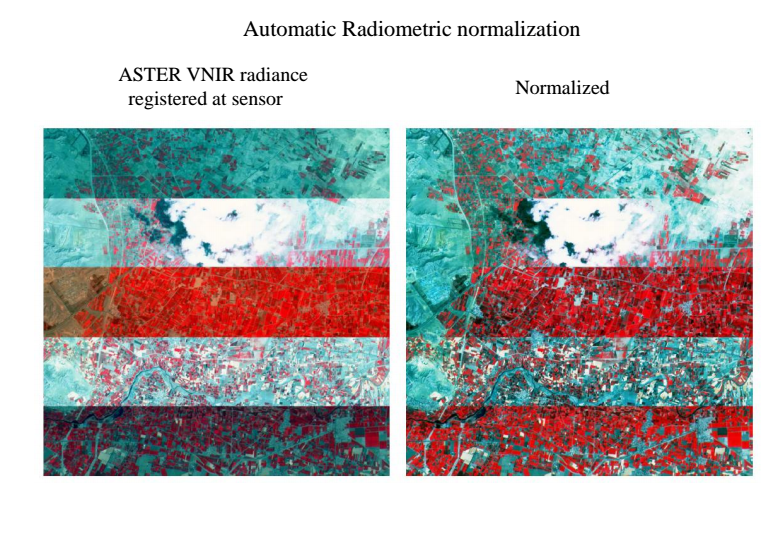

In [2]:
from IPython.display import Image

Image('/home/mort/Bilder/radcal_aster.png')